<a href="https://colab.research.google.com/github/IngridSchieven/Final-assignment---CO2-emissions---Ingrid/blob/main/FA_Q3_Non_fossil_fuel_best_price0722Ingrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Assignment
# Q3 Which non-fossil fuel energy technology will have the best price in the future?

# 3: Best future price for non-fossil fuel energy
# To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

In [ ]:
# Stap 1: Onderzoeksvraag begrijpen en aanvullende informatie zoeken

# Non-fossil fuel energy: zonne-energie(solar), hydroelectric(waterstof), 
# biomassa/houtsnippers, windenergie, geothermal


In [ ]:
#doel: lijndiagram
#x-as: years
#y-as: energy capaciteit of verbruik x prijs
#trend zichtbaar maken

In [ ]:
# Stap 2: Relevante dataset zoeken!
url = 'https://ourworldindata.org/grapher/annual-change-renewables'

url1 = 'https://ourworldindata.org/cheap-renewables-growth' #= afbeelding prijsveranderingen
url2 = 'https://ourworldindata.org/energy-mix' #= overzicht soorten
url3 = 'https://ourworldindata.org/cheap-renewables-growth' #= prijsdaling zichtbaar trend ook

# meest geschikte dataset:
url4 = 'https://ourworldindata.org/grapher/levelized-cost-of-energy?country=~OWID_WRL'#prijsoverzicht energy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

In [ ]:
#onderstaande dataset geeft inzicht in de prijsontwikkelingen van energy.
df = pd.read_csv('/content/levelized-cost-of-energy.csv')
df.sample(10)

,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
376,World,OWID_WRL,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
405,World,OWID_WRL,2002,NaN,NaN,NaN,0.119,NaN,NaN,0.117
127,Germany,DEU,2011,NaN,NaN,0.2941,0.107,NaN,NaN,NaN
303,Turkey,TUR,2017,NaN,NaN,0.1072,0.059,NaN,NaN,NaN
333,United Kingdom,GBR,1997,NaN,NaN,NaN,0.170,NaN,NaN,NaN
265,Spain,ESP,2006,NaN,NaN,NaN,0.109,NaN,NaN,NaN
7,Brazil,BRA,2008,NaN,NaN,NaN,0.090,NaN,NaN,NaN
184,India,IND,2007,NaN,NaN,NaN,0.103,NaN,NaN,NaN
133,Germany,DEU,2017,NaN,NaN,0.1092,0.083,NaN,NaN,NaN
282,Sweden,SWE,1999,NaN,NaN,NaN,0.151,NaN,NaN,NaN


In [ ]:
# I want to look at the figures of the past 20 years
# the following actions are needed:
# remove non relevant columns
# remove rows  - only keep World
# consider of renaming the index
# NaN's if needed

In [ ]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             413 non-null    object 
 1   Code                               413 non-null    object 
 2   Year                               413 non-null    int64  
 3   CSP LCOE (2019 USD/kWh)            10 non-null     float64
 4   Hydro LCOE (2019 USD/kWh)          10 non-null     float64
 5   Solar LCOE (2019 USD/kWh)          98 non-null     float64
 6   Onshore wind LCOE (2019 USD/kWh)   413 non-null    float64
 7   Bioenergy LCOE (2019 USD/kWh)      10 non-null     float64
 8   Geothermal LCOE (2019 USD/kWh)     12 non-null     float64
 9   Offshore wind LCOE (2019 USD/kWh)  20 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 32.4+ KB


In [ ]:
# Quick overview of missing data:
for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#Start to clean up the dataset

#drop columns that are irrelevant = Solar CSP en Geothermal are not used as fuel
df.columns #copy them out of here to make no typing-errors
df1 = df.drop(columns=['Code', 'CSP LCOE (2019 USD/kWh)', 'Geothermal LCOE (2019 USD/kWh)'])

#rename columns
df2 = df1.rename(columns= {'Hydro LCOE (2019 USD/kWh)': 'Hydro', 'Solar LCOE (2019 USD/kWh)': 'Solar', 'Onshore wind LCOE (2019 USD/kWh)': 'Onshore_wind', 'Offshore wind LCOE (2019 USD/kWh)': 'Offshore_wind', 'Bioenergy LCOE (2019 USD/kWh)': 'Bio_energy'})

In [ ]:
#just need World
df2 = df2.loc[376:]
df2.head(10)

,Entity,Year,Hydro,Solar,Onshore_wind,Bio_energy,Offshore_wind
376,World,2010,0.037103,0.3783,0.086,0.075597,0.161
377,World,2011,0.035594,0.2863,0.083,0.055425,0.175
378,World,2012,0.037753,0.2225,0.083,0.060869,0.154
379,World,2013,0.042926,0.1751,0.082,0.081262,0.177
380,World,2014,0.043932,0.1636,0.076,0.082069,0.183
381,World,2015,0.039014,0.1264,0.069,0.073028,0.169
382,World,2016,0.052220,0.1139,0.066,0.071932,0.146
383,World,2017,0.055025,0.0924,0.064,0.072432,0.131
384,World,2018,0.044514,0.0787,0.058,0.056632,0.127
385,World,2019,0.047287,0.0684,0.053,0.065647,0.115


In [ ]:
#volgorde aanpassen
df3 = df2.sort_values('Year', ascending=True)
#last 20 years wil give a better view of the figures 
df3 = df3.loc[403:]
df3

,Entity,Year,Hydro,Solar,Onshore_wind,Bio_energy,Offshore_wind
403,World,2000,NaN,NaN,0.142,NaN,0.121
404,World,2001,NaN,NaN,0.126,NaN,0.120
405,World,2002,NaN,NaN,0.119,NaN,0.117
406,World,2003,NaN,NaN,0.106,NaN,0.103
407,World,2004,NaN,NaN,0.111,NaN,0.135
408,World,2005,NaN,NaN,0.104,NaN,0.105
409,World,2006,NaN,NaN,0.105,NaN,0.108
410,World,2007,NaN,NaN,0.098,NaN,0.178
411,World,2008,NaN,NaN,0.088,NaN,0.178
412,World,2009,NaN,NaN,0.087,NaN,0.157


In [ ]:
#set index
df4 = df3.set_index('Year') #twijfel of index goed gaat bij het plotten
df5 = df4.drop(columns=['Entity'])

In [ ]:
df5

,Hydro,Solar,Onshore_wind,Bio_energy,Offshore_wind
Year,,,,,
2000,NaN,NaN,0.142,NaN,0.121
2001,NaN,NaN,0.126,NaN,0.120
2002,NaN,NaN,0.119,NaN,0.117
2003,NaN,NaN,0.106,NaN,0.103
2004,NaN,NaN,0.111,NaN,0.135
2005,NaN,NaN,0.104,NaN,0.105
2006,NaN,NaN,0.105,NaN,0.108
2007,NaN,NaN,0.098,NaN,0.178
2008,NaN,NaN,0.088,NaN,0.178


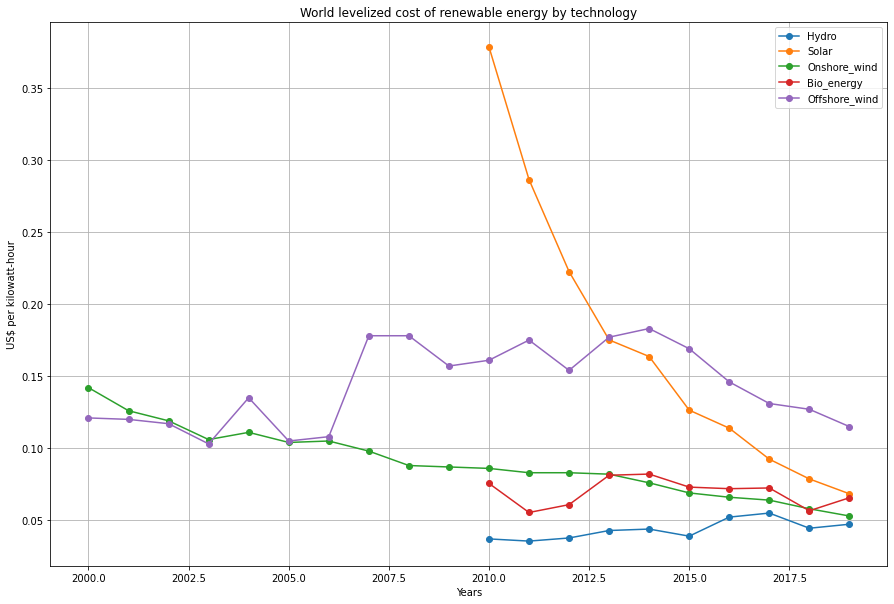

In [ ]:
#make a plot
ax = df5.plot(figsize=(15,10), marker = 'o')
plt.title('World levelized cost of renewable energy by technology')
plt.xlabel('Years')
plt.ylabel('US$ per kilowatt-hour')
plt.grid()

Text(0, 0.5, 'US$ per kilowatt-hour')

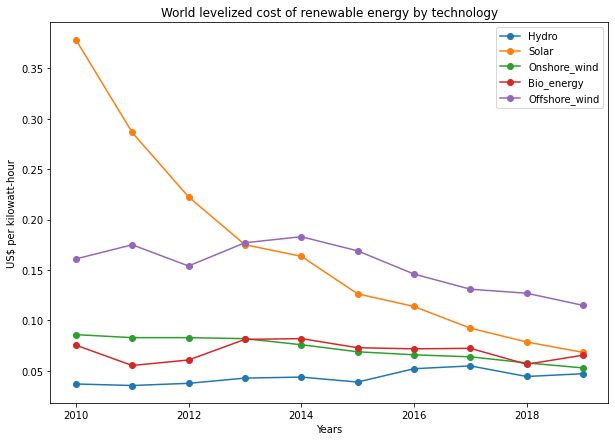

In [ ]:
# Refine plot
# From 2010 because of adding solar/bio/hydro
df6 = df5.loc['2010':]
#df6
ax = df6.plot(figsize=(10,7), marker = 'o')
plt.title('World levelized prices of renewable energy by technology')
plt.xlabel('Years')
plt.ylabel('US$ per kilowatt-hour')


In [ ]:
# Next step: prediction plot by adding Linear Regression
# theorie: Linear regression uses the relationship between the data-points to draw a straight line through all them.
# This line can be used to predict future values.

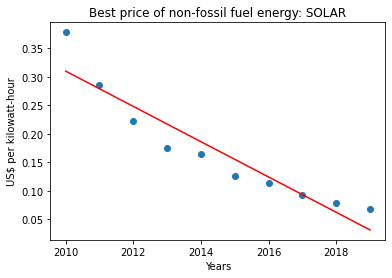

In [ ]:
#lin reg 1 

#test SOLAR

from sklearn.linear_model import LinearRegression
#x = df6.index #array van maken en reshapen
x = np.array(df6.index).reshape(-1, 1)
y = df6['Solar'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.title('Best price of non-fossil fuel energy: SOLAR')
plt.xlabel('Years')
plt.ylabel('US$ per kilowatt-hour')
plt.show()

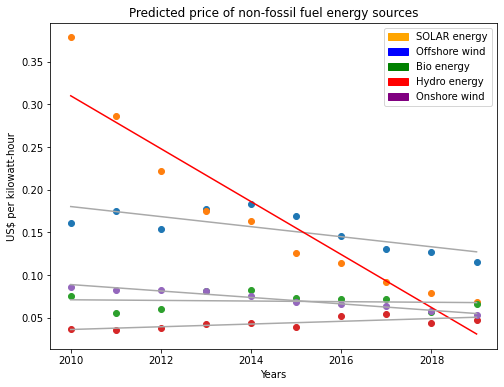

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.patches as mpatches
#test Offshore_wind
plt.figure(figsize=(8, 6)) #gevonden op stackoverflow, positie vooooooor en niet achteraaaaaan #before the code
from sklearn.linear_model import LinearRegression
#x = df6.index #array van maken en reshapen
x = np.array(df6.index).reshape(-1, 1)
y = df6['Offshore_wind'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='darkgrey') 
#ax = df6.plot(figsize=(10,7), marker = 'o'

x = np.array(df6.index).reshape(-1, 1)
y = df6['Solar'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')

x = np.array(df6.index).reshape(-1, 1)
y = df6['Bio_energy'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='darkgrey')

x = np.array(df6.index).reshape(-1, 1)
y = df6['Hydro'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='darkgrey')

x = np.array(df6.index).reshape(-1, 1)
y = df6['Onshore_wind'] 

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='darkgrey')

#fig = plt.figure(figsize = (15.5,11))
plt.title('Predicted price of non-fossil fuel energy sources')
plt.xlabel('Years')
plt.ylabel('US$ per kilowatt-hour')
#plt.legend()
orange_patch = mpatches.Patch(color='orange', label='SOLAR energy')
blue_path = mpatches.Patch(color='blue', label = 'Offshore wind')
purple_path = mpatches.Patch(color='purple', label = 'Onshore wind')
green_path = mpatches.Patch(color='green', label = 'Bio energy')
red_path = mpatches.Patch(color='red', label= 'Hydro energy')

plt.legend(handles=[orange_patch, blue_path, green_path, red_path, purple_path])

#plt.grid()
plt.show()

In [ ]:
df6

,Hydro,Solar,Onshore_wind,Bio_energy,Offshore_wind
Year,,,,,
2010,0.037,0.378,0.086,0.076,0.161
2011,0.036,0.286,0.083,0.055,0.175
2012,0.038,0.223,0.083,0.061,0.154
2013,0.043,0.175,0.082,0.081,0.177
2014,0.044,0.164,0.076,0.082,0.183
2015,0.039,0.126,0.069,0.073,0.169
2016,0.052,0.114,0.066,0.072,0.146
2017,0.055,0.092,0.064,0.072,0.131
2018,0.045,0.079,0.058,0.057,0.127


In [ ]:
df6.info()

In [ ]:
# Conclusion: solar energy has the best future prices for non-fossil fuel energy. 